In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
#Loading in data using pandas
df = pd.read_csv("./Global_Cybersecurity_Threats_2015-2024.csv")

#splitting data into features and target
X = df.drop(columns=["Financial Loss (in Million $)"])
Y = df['Financial Loss (in Million $)']



In [3]:
df['Incident Resolution Time (in Hours)']

,Incident Resolution Time (in Hours)
0,63
1,71
2,20
3,7
4,68
...,...
2995,52
2996,26
2997,30
2998,9


<function matplotlib.pyplot.show(close=None, block=None)>

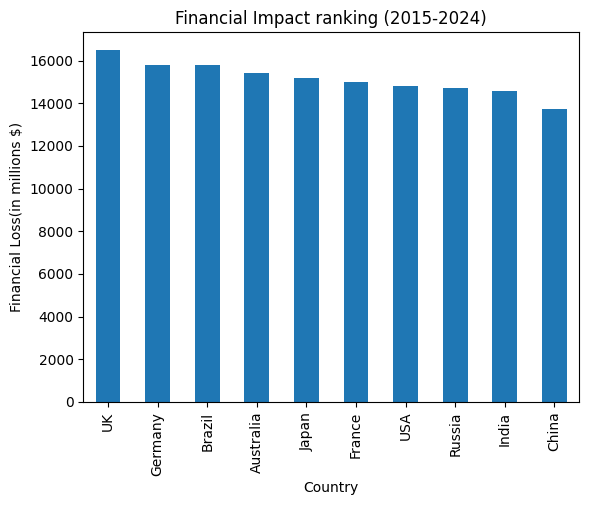

In [7]:
ranking = df.groupby("Country")["Financial Loss (in Million $)"].sum().sort_values(ascending=False)
ranking.plot(kind="bar")
plt.title("Financial Impact ranking (2015-2024)")
plt.ylabel("Financial Loss(in millions $)")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

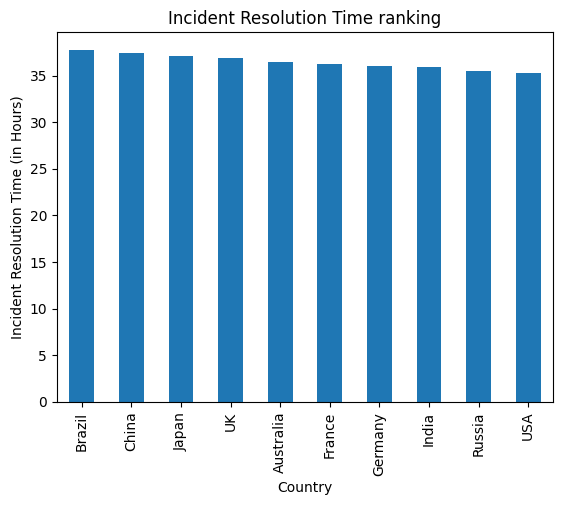

In [9]:
ranking = df.groupby("Country")["Incident Resolution Time (in Hours)"].mean().sort_values(ascending=False)
ranking.plot(kind="bar")
plt.title("Incident Resolution Time ranking")
plt.ylabel("Incident Resolution Time (in Hours)")
plt.show

In [88]:
X.isnull()

,Country,Year,Attack Type,Target Industry,Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
2995,False,False,False,False,False,False,False,False,False
2996,False,False,False,False,False,False,False,False,False
2997,False,False,False,False,False,False,False,False,False
2998,False,False,False,False,False,False,False,False,False


In [89]:
X.describe()

,Year,Number of Affected Users,Incident Resolution Time (in Hours)
count,3000.000000,3000.000000,3000.000000
mean,2019.570333,504684.136333,36.476000
std,2.857932,289944.084972,20.570768
min,2015.000000,424.000000,1.000000
25%,2017.000000,255805.250000,19.000000
50%,2020.000000,504513.000000,37.000000
75%,2022.000000,758088.500000,55.000000
max,2024.000000,999635.000000,72.000000


In [90]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Country                              3000 non-null   object
 1   Year                                 3000 non-null   int64 
 2   Attack Type                          3000 non-null   object
 3   Target Industry                      3000 non-null   object
 4   Number of Affected Users             3000 non-null   int64 
 5   Attack Source                        3000 non-null   object
 6   Security Vulnerability Type          3000 non-null   object
 7   Defense Mechanism Used               3000 non-null   object
 8   Incident Resolution Time (in Hours)  3000 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 211.1+ KB


In [91]:
#Encoding categorial data or data with type 'object'
preprocessor = LabelEncoder()
X['Country'] = preprocessor.fit_transform(X['Country'])
X['Attack Type'] = preprocessor.fit_transform(X['Attack Type'])
X['Target Industry'] = preprocessor.fit_transform(X['Target Industry'])
X['Attack Source'] = preprocessor.fit_transform(X['Attack Source'])
X['Security Vulnerability Type'] = preprocessor.fit_transform(X['Security Vulnerability Type'])
X['Defense Mechanism Used'] = preprocessor.fit_transform(X['Defense Mechanism Used'])

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Country                              3000 non-null   int64
 1   Year                                 3000 non-null   int64
 2   Attack Type                          3000 non-null   int64
 3   Target Industry                      3000 non-null   int64
 4   Number of Affected Users             3000 non-null   int64
 5   Attack Source                        3000 non-null   int64
 6   Security Vulnerability Type          3000 non-null   int64
 7   Defense Mechanism Used               3000 non-null   int64
 8   Incident Resolution Time (in Hours)  3000 non-null   int64
dtypes: int64(9)
memory usage: 211.1 KB


In [92]:
X.describe()

,Country,Year,Attack Type,Target Industry,Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,4.512333,2019.570333,2.492333,2.985667,504684.136333,1.548000,1.517667,2.005000,36.476000
std,2.868552,2.857932,1.723639,1.990339,289944.084972,1.103374,1.127584,1.413615,20.570768
min,0.000000,2015.000000,0.000000,0.000000,424.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,2017.000000,1.000000,1.000000,255805.250000,1.000000,1.000000,1.000000,19.000000
50%,5.000000,2020.000000,3.000000,3.000000,504513.000000,2.000000,2.000000,2.000000,37.000000
75%,7.000000,2022.000000,4.000000,5.000000,758088.500000,3.000000,3.000000,3.000000,55.000000
max,9.000000,2024.000000,5.000000,6.000000,999635.000000,3.000000,3.000000,4.000000,72.000000


In [93]:
#Splitting data into train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.35, random_state=42)
len(X_train), len(X_test)

(1950, 1050)

In [94]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

len(X_train_scaled), len(X_test_scaled)

(1950, 1050)

In [95]:
#Loading and fitting model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train_scaled, Y_train)
model.score(X_train_scaled, Y_train)


0.8545185524369239

In [96]:
# X_test['Country']

In [102]:
y_pred = model.predict(X_test)
y_pred

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([54.1705, 50.787 , 65.39  , ..., 68.7642, 55.7035, 60.5439])